# Augendiagramm für BPSK und Kosinus-Rolloff-Filter

In [16]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
ECCpath = '../ECCpython'
if (not ECCpath==None) and (not ECCpath in sys.path):
    sys.path.append(ECCpath)

from Modulation.modulation import Modulation

save_results = False

# cardinality of modulation scheme
M = 2
# number of information bits to be generated
N_info_bits = 512

# number of bits per ASK symbol
m = int(np.round(np.log2(M)))
# number of symbols obtained from information bits
N_symbols = int(N_info_bits / m)
time_symbol = np.arange(N_symbols)

# generate BPSK object
bpsk = Modulation(m=m, modulation_type='PSK')

# generate information bits u[k]
info_bits = np.random.randint(0,2,N_info_bits,dtype=int)

# modulate information bits using BPSK
d_bpsk = bpsk.modulate(info_bits).real

# roll-off factor of Root-Raised-Cosine filter
r = (0.25, 0.5, 0.75, 1.0)

# symbol duration in seconds
Ts = 1e-6
# oversampling factor
w = 128
# sampling rate in Hz
fa = w / Ts
# length of filter in number of symbols
N_rc_symbols = 32
# length of filter impulse response in samples
N_rc = N_rc_symbols*w


x_rrc = np.zeros((len(r),N_symbols*w+N_rc-1),dtype=float)
x_rc = np.zeros((len(r),N_symbols*w+N_rc-1),dtype=float)
for run in np.arange(len(r)):
    _,x_rrc[run,:] = bpsk.impulse_shaping(data=d_bpsk, filter_type='rrc', filter_length=N_rc, symbol_duration=Ts, sampling_rate=fa, rolloff=r[run])
    _,x_rc[run,:] = bpsk.impulse_shaping(data=d_bpsk, filter_type='rc', filter_length=N_rc, symbol_duration=Ts, sampling_rate=fa, rolloff=r[run])
time = (np.arange(N_symbols*w+N_rc-1)-N_rc/2) / w

start = int((N_rc-w)/2) 
stop  = start + N_symbols * w 
eye_time = np.arange(-Ts/2,Ts/2+1/fa,1/fa) / Ts


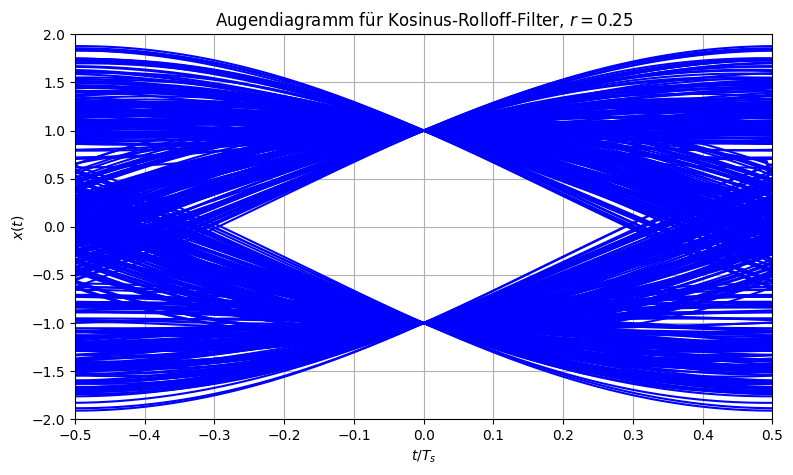

In [17]:
eye_rc = np.reshape(x_rc[0,start:stop],(w,N_symbols),order='f')
eye_rrc = np.reshape(x_rrc[0,start:stop],(w,N_symbols),order='f')

eye_rc = np.append(eye_rc, np.zeros((1,N_symbols),dtype=float),axis=0)
eye_rrc = np.append(eye_rrc, np.zeros((1,N_symbols),dtype=float),axis=0)
for run in range(N_symbols-1):
    eye_rc [-1,run] = eye_rc[0,run+1]
    eye_rrc [-1,run] = eye_rrc[0,run+1]
    
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.plot(eye_time,eye_rc, 'b-')
plt.xlabel('$t/T_s$')
plt.ylabel('$x(t)$')
plt.xticks([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])
plt.title('Augendiagramm für Kosinus-Rolloff-Filter, $r=$%1.2f' %(r[0]))
plt.grid(True)
plt.axis([-0.5, 0.5, -2.0, 2.0])

if save_results:
    erg = np.append(eye_time.reshape(w+1,1),eye_rc,axis=1)
    np.savetxt('Results/NTpart3_auge_BPSK_rc025.txt',erg)

    erg = np.append(eye_time.reshape(w+1,1),eye_rrc,axis=1)
    np.savetxt('Results/NTpart3_auge_BPSK_rrc025.txt',erg)

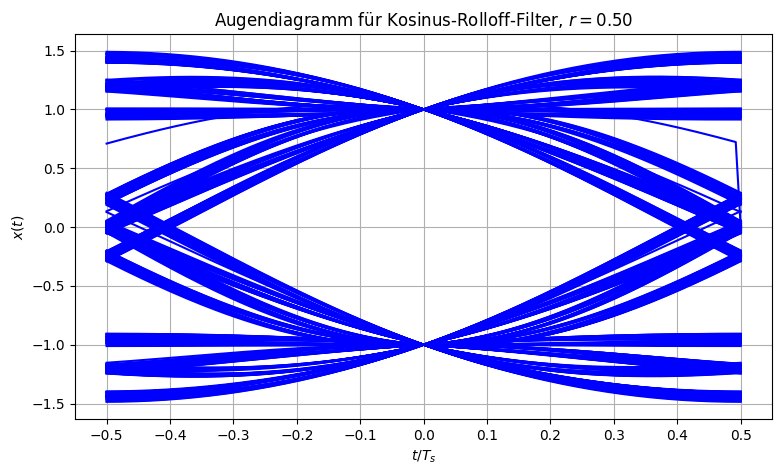

In [18]:
eye_rc = np.reshape(x_rc[1,start:stop],(w,N_symbols),order='f')
eye_rrc = np.reshape(x_rrc[1,start:stop],(w,N_symbols),order='f')

eye_rc = np.append(eye_rc, np.zeros((1,N_symbols),dtype=float),axis=0)
eye_rrc = np.append(eye_rrc, np.zeros((1,N_symbols),dtype=float),axis=0)
for run in range(N_symbols-1):
    eye_rc [-1,run] = eye_rc[0,run+1]
    eye_rrc [-1,run] = eye_rrc[0,run+1]
    
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.plot(eye_time,eye_rc, 'b-')
plt.xlabel('$t/T_s$')
plt.ylabel('$x(t)$')
plt.xticks([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])
plt.title('Augendiagramm für Kosinus-Rolloff-Filter, $r=$%1.2f' %(r[1]))
plt.grid(True)

if save_results:
    erg = np.append(eye_time.reshape(128,1),eye_rc,axis=1)
    np.savetxt('Results/NTpart3_auge_BPSK_rc05.txt',erg)

    erg = np.append(eye_time.reshape(128,1),eye_rrc,axis=1)
    np.savetxt('Results/NTpart3_auge_BPSK_rrc05.txt',erg)

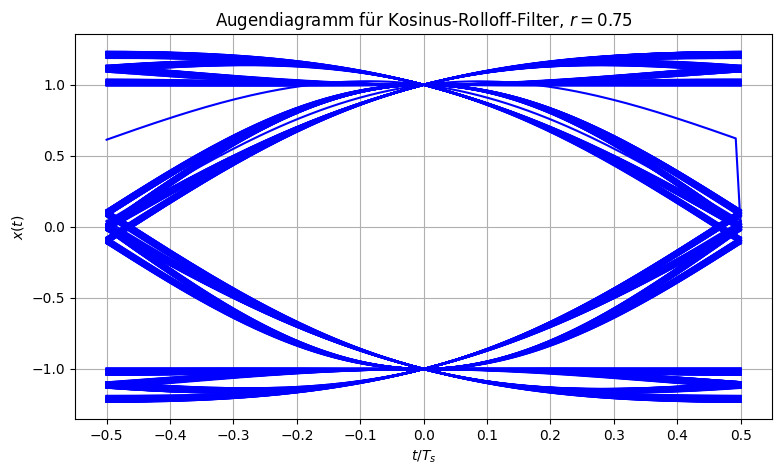

In [19]:
eye_rc = np.reshape(x_rc[2,start:stop],(w,N_symbols),order='f')
eye_rrc = np.reshape(x_rrc[2,start:stop],(w,N_symbols),order='f')

eye_rc = np.append(eye_rc, np.zeros((1,N_symbols),dtype=float),axis=0)
eye_rrc = np.append(eye_rrc, np.zeros((1,N_symbols),dtype=float),axis=0)
for run in range(N_symbols-1):
    eye_rc [-1,run] = eye_rc[0,run+1]
    eye_rrc [-1,run] = eye_rrc[0,run+1]

fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.plot(eye_time,eye_rc, 'b-')
plt.xlabel('$t/T_s$')
plt.ylabel('$x(t)$')
plt.xticks([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])
plt.title('Augendiagramm für Kosinus-Rolloff-Filter, $r=$%1.2f' %(r[2]))
plt.grid(True)

if save_results:
    erg = np.append(eye_time.reshape(128,1),eye_rc,axis=1)
    np.savetxt('Results/NTpart3_auge_BPSK_rc075.txt',erg)

    erg = np.append(eye_time.reshape(128,1),eye_rrc,axis=1)
    np.savetxt('Results/NTpart3_auge_BPSK_rrc075.txt',erg)

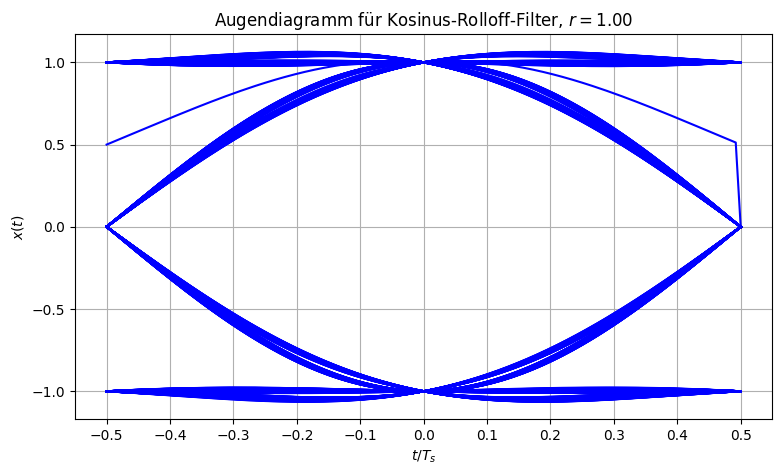

In [20]:
eye_rc = np.reshape(x_rc[3,start:stop],(w,N_symbols),order='f')
eye_rrc = np.reshape(x_rrc[3,start:stop],(w,N_symbols),order='f')

eye_rc = np.append(eye_rc, np.zeros((1,N_symbols),dtype=float),axis=0)
eye_rrc = np.append(eye_rrc, np.zeros((1,N_symbols),dtype=float),axis=0)
for run in range(N_symbols-1):
    eye_rc [-1,run] = eye_rc[0,run+1]
    eye_rrc [-1,run] = eye_rrc[0,run+1]

fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot(111)
ax.plot(eye_time,eye_rc, 'b-')
plt.xlabel('$t/T_s$')
plt.ylabel('$x(t)$')
plt.xticks([-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5])
plt.title('Augendiagramm für Kosinus-Rolloff-Filter, $r=$%1.2f' %(r[3]))
plt.grid(True)

if save_results:
    erg = np.append(eye_time.reshape(128,1),eye_rc,axis=1)
    np.savetxt('Results/NTpart3_auge_BPSK_rc10.txt',erg)

    erg = np.append(eye_time.reshape(128,1),eye_rrc,axis=1)
    np.savetxt('Results/NTpart3_auge_BPSK_rrc10.txt',erg)